In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from joblib import dump, load

In [59]:
df = pd.read_csv('/home/ashwin/dataset1 (1).csv')
data = pd.read_csv('/home/ashwin/dataset2 (1).csv')

In [60]:
df.isnull().sum()

Unique Code                               0
State                                     0
Year                                      0
Population                                0
Total Internet Subscriptions              0
Total Broadband Subscriptions             0
 Total Wireless internet Subscriptions    0
Cases Reported                            0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Unique Code                             119 non-null    int64 
 1   State                                   119 non-null    object
 2   Year                                    119 non-null    int64 
 3   Population                              119 non-null    int64 
 4   Total Internet Subscriptions            119 non-null    int64 
 5   Total Broadband Subscriptions           119 non-null    int64 
 6    Total Wireless internet Subscriptions  119 non-null    int64 
 7   Cases Reported                          119 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 7.6+ KB


In [62]:
data.isnull().sum()

State/UT         0
Cases in 2015    0
Cases in 2016    0
Cases in 2017    0
Cases in 2018    0
Cases in 2019    0
Cases in 2020    0
Cases in 2021    0
Total Crimes     0
dtype: int64

In [63]:
states = list(set(df['State '].to_list()))
states.sort()
states

['Bihar', 'Karnataka', 'Kerala', 'Telangana', 'ap']

<Axes: xlabel='Year', ylabel='Cases Reported'>

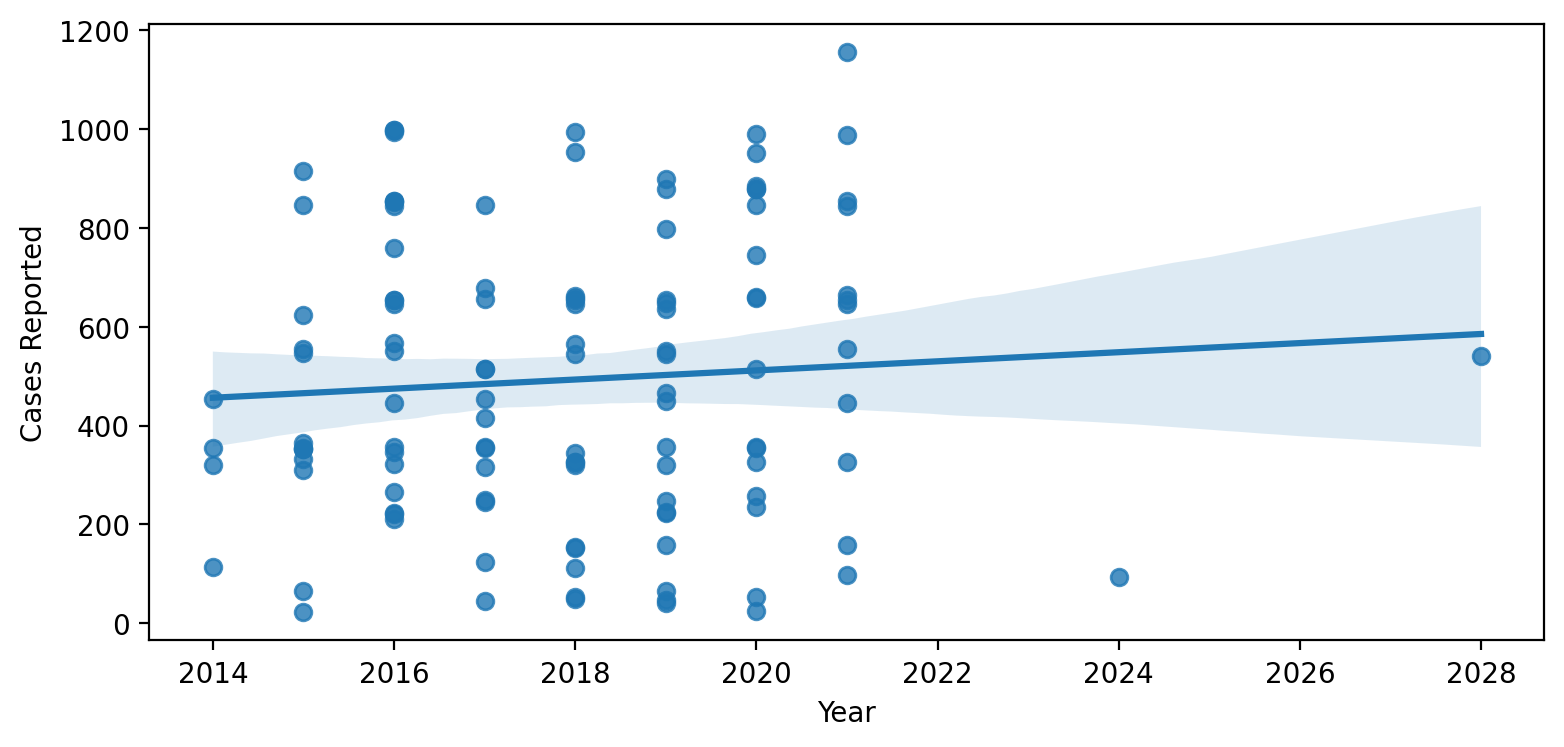

In [64]:
plt.figure(figsize=(9,4), dpi=200, alpha=0.5)
sns.regplot(data=df, x='Year', y='Cases Reported')

In [109]:
state_info = {"state ":"Bihar","year":"2018","population":"128799926","tis":"62620000","tbs":"63950000","twis":"59880000"} #tis: total internet subscribers , tbs: brodband subs twis:wireles subs
one_state = df[df['State '] == state_info['state ']]

In [110]:
one_state

,Unique Code,State,Year,Population,Total Internet Subscriptions,Total Broadband Subscriptions,Total Wireless internet Subscriptions,Cases Reported
0,4,Bihar,2014,107823158,11850000,2100000,11570000,114
3,4,Bihar,2017,113042198,24100000,12030000,23810000,249
6,4,Bihar,2015,107823158,24100000,12030000,20301131,352
9,4,Bihar,2021,102504976,16580000,2100000,19340000,326
14,4,Bihar,2020,189462003,11850000,3031646,11570000,661
19,4,Bihar,2020,102504976,20610516,2031605,11570000,54
24,4,Bihar,2018,113042198,24100000,3150000,20301131,54
29,4,Bihar,2017,107823158,16580000,3150000,23810000,245
34,4,Bihar,2020,189462003,20310356,2031605,19340000,357
39,4,Bihar,2019,189462003,10200316,12030000,19340000,159


In [111]:
X = one_state.drop(['Unique Code', 'State ', 'Cases Reported'], axis=1)
y = one_state['Cases Reported']
X

,Year,Population,Total Internet Subscriptions,Total Broadband Subscriptions,Total Wireless internet Subscriptions
0,2014,107823158,11850000,2100000,11570000
3,2017,113042198,24100000,12030000,23810000
6,2015,107823158,24100000,12030000,20301131
9,2021,102504976,16580000,2100000,19340000
14,2020,189462003,11850000,3031646,11570000
19,2020,102504976,20610516,2031605,11570000
24,2018,113042198,24100000,3150000,20301131
29,2017,107823158,16580000,3150000,23810000
34,2020,189462003,20310356,2031605,19340000
39,2019,189462003,10200316,12030000,19340000


In [112]:
y

0      114
3      249
6      352
9      326
14     661
19      54
24      54
29     245
34     357
39     159
44     954
48     885
52     224
56     995
60     654
65     847
70     332
75     648
80     989
85     657
91      24
96      65
101    664
104    454
108    235
112    356
116    248
Name: Cases Reported, dtype: int64

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [114]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [115]:
predictions = model.predict(X_test)
predictions

array([154.82363305, 514.0549227 , 518.34463515, 366.86370559,
       477.70231769, 619.42262625, 283.40675692, 190.97572103,
       386.12839686])

In [116]:
mean_cases = y.mean()
mean_cases

437.1111111111111

<Axes: xlabel='Cases Reported', ylabel='Count'>

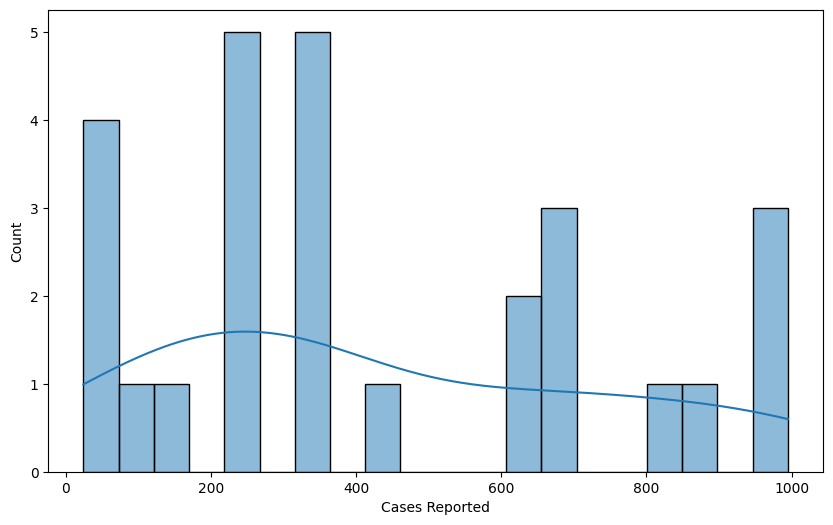

In [117]:
sns.histplot(data=one_state, x='Cases Reported', bins=20, kde=True)

In [118]:
mae = mean_absolute_error(y_test,predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

In [119]:
mean_cases, mae, rmse

(437.1111111111111, 394.5424572364512, 439.0582849884637)

In [120]:
residuals = y_test - predictions

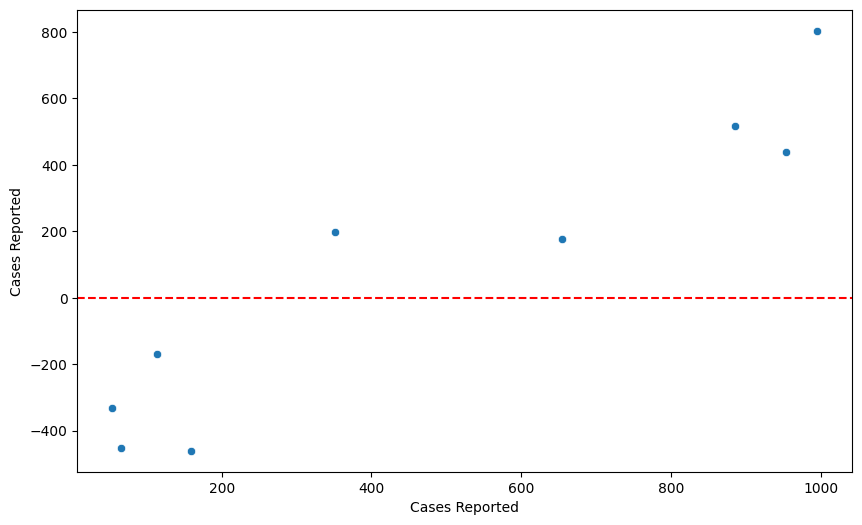

In [121]:
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='r', ls='--')

In [122]:
final_model = LinearRegression()
final_model.fit(X.values,y.values)

LinearRegression()

In [123]:
X

,Year,Population,Total Internet Subscriptions,Total Broadband Subscriptions,Total Wireless internet Subscriptions
0,2014,107823158,11850000,2100000,11570000
3,2017,113042198,24100000,12030000,23810000
6,2015,107823158,24100000,12030000,20301131
9,2021,102504976,16580000,2100000,19340000
14,2020,189462003,11850000,3031646,11570000
19,2020,102504976,20610516,2031605,11570000
24,2018,113042198,24100000,3150000,20301131
29,2017,107823158,16580000,3150000,23810000
34,2020,189462003,20310356,2031605,19340000
39,2019,189462003,10200316,12030000,19340000


In [124]:
y

0      114
3      249
6      352
9      326
14     661
19      54
24      54
29     245
34     357
39     159
44     954
48     885
52     224
56     995
60     654
65     847
70     332
75     648
80     989
85     657
91      24
96      65
101    664
104    454
108    235
112    356
116    248
Name: Cases Reported, dtype: int64

In [125]:
final_model.coef_

array([ 2.20878336e+01,  2.29981142e-06,  1.26174668e-05, -8.72129715e-06,
        4.95586264e-06])

In [126]:
predicted_crimes = final_model.predict(X.values)
predicted_crimes

array([224.73583235, 431.6233867 , 358.05543891, 465.3075224 ,
       536.89162015, 456.1640308 , 513.7668662 , 402.18234764,
       690.86858814, 454.01868717, 550.9095779 , 473.49336044,
       385.85362303, 374.83223292, 647.27992063, 700.17724257,
       407.65575075, 410.8413358 , 445.67262915, 357.25642231,
       391.00072979, 287.04300708, 419.57000874, 329.50638591,
       357.26283401, 335.1750004 , 394.85561813])

In [127]:
y

0      114
3      249
6      352
9      326
14     661
19      54
24      54
29     245
34     357
39     159
44     954
48     885
52     224
56     995
60     654
65     847
70     332
75     648
80     989
85     657
91      24
96      65
101    664
104    454
108    235
112    356
116    248
Name: Cases Reported, dtype: int64

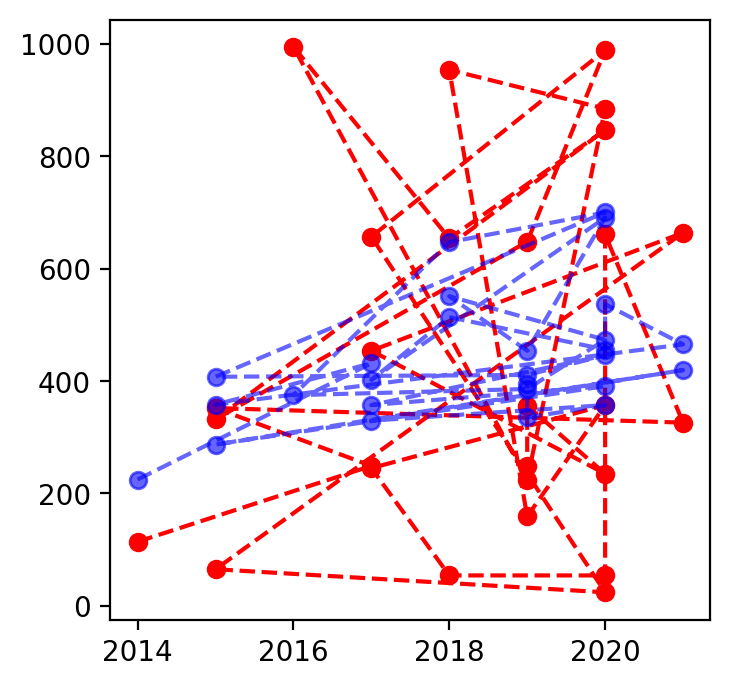

In [128]:
fig = plt.figure(figsize=(6,6), dpi=200)
axes = fig.add_axes([0,0,0.5,0.5])
axes.plot(one_state['Year'], one_state['Cases Reported'], 'o', color='red', linestyle='dashed',label="Actual Data");
axes.plot(one_state['Year'], predicted_crimes, 'o', color='blue', linestyle='dashed', alpha=0.6,label="Predicted Data");

<BarContainer object of 27 artists>

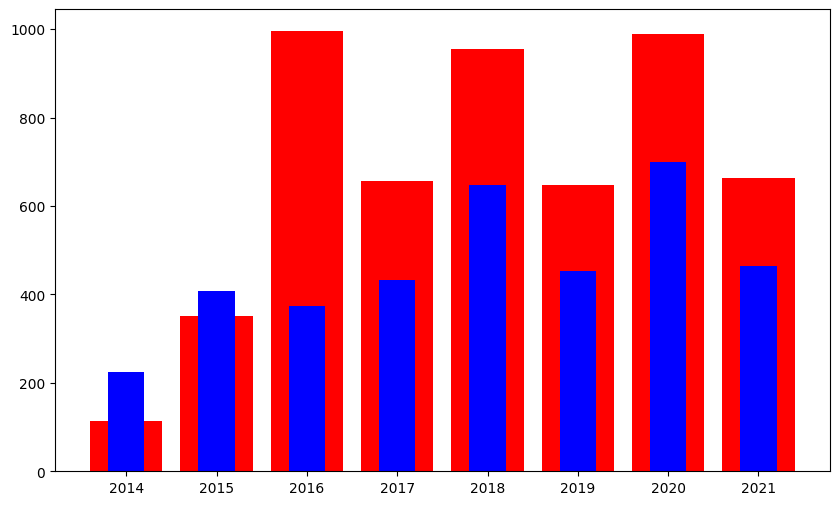

In [129]:
plt.bar(one_state['Year'], one_state['Cases Reported'],color="red",label="Actual Data")
plt.bar(one_state['Year'], predicted_crimes,0.4,color="blue",label="Predicted Data")

In [130]:
one_state.head()

,Unique Code,State,Year,Population,Total Internet Subscriptions,Total Broadband Subscriptions,Total Wireless internet Subscriptions,Cases Reported
0,4,Bihar,2014,107823158,11850000,2100000,11570000,114
3,4,Bihar,2017,113042198,24100000,12030000,23810000,249
6,4,Bihar,2015,107823158,24100000,12030000,20301131,352
9,4,Bihar,2021,102504976,16580000,2100000,19340000,326
14,4,Bihar,2020,189462003,11850000,3031646,11570000,661


In [131]:
print(df.columns)

Index(['Unique Code', 'State ', 'Year', 'Population',
       'Total Internet Subscriptions', 'Total Broadband Subscriptions',
       ' Total Wireless internet Subscriptions', 'Cases Reported'],
      dtype='object')


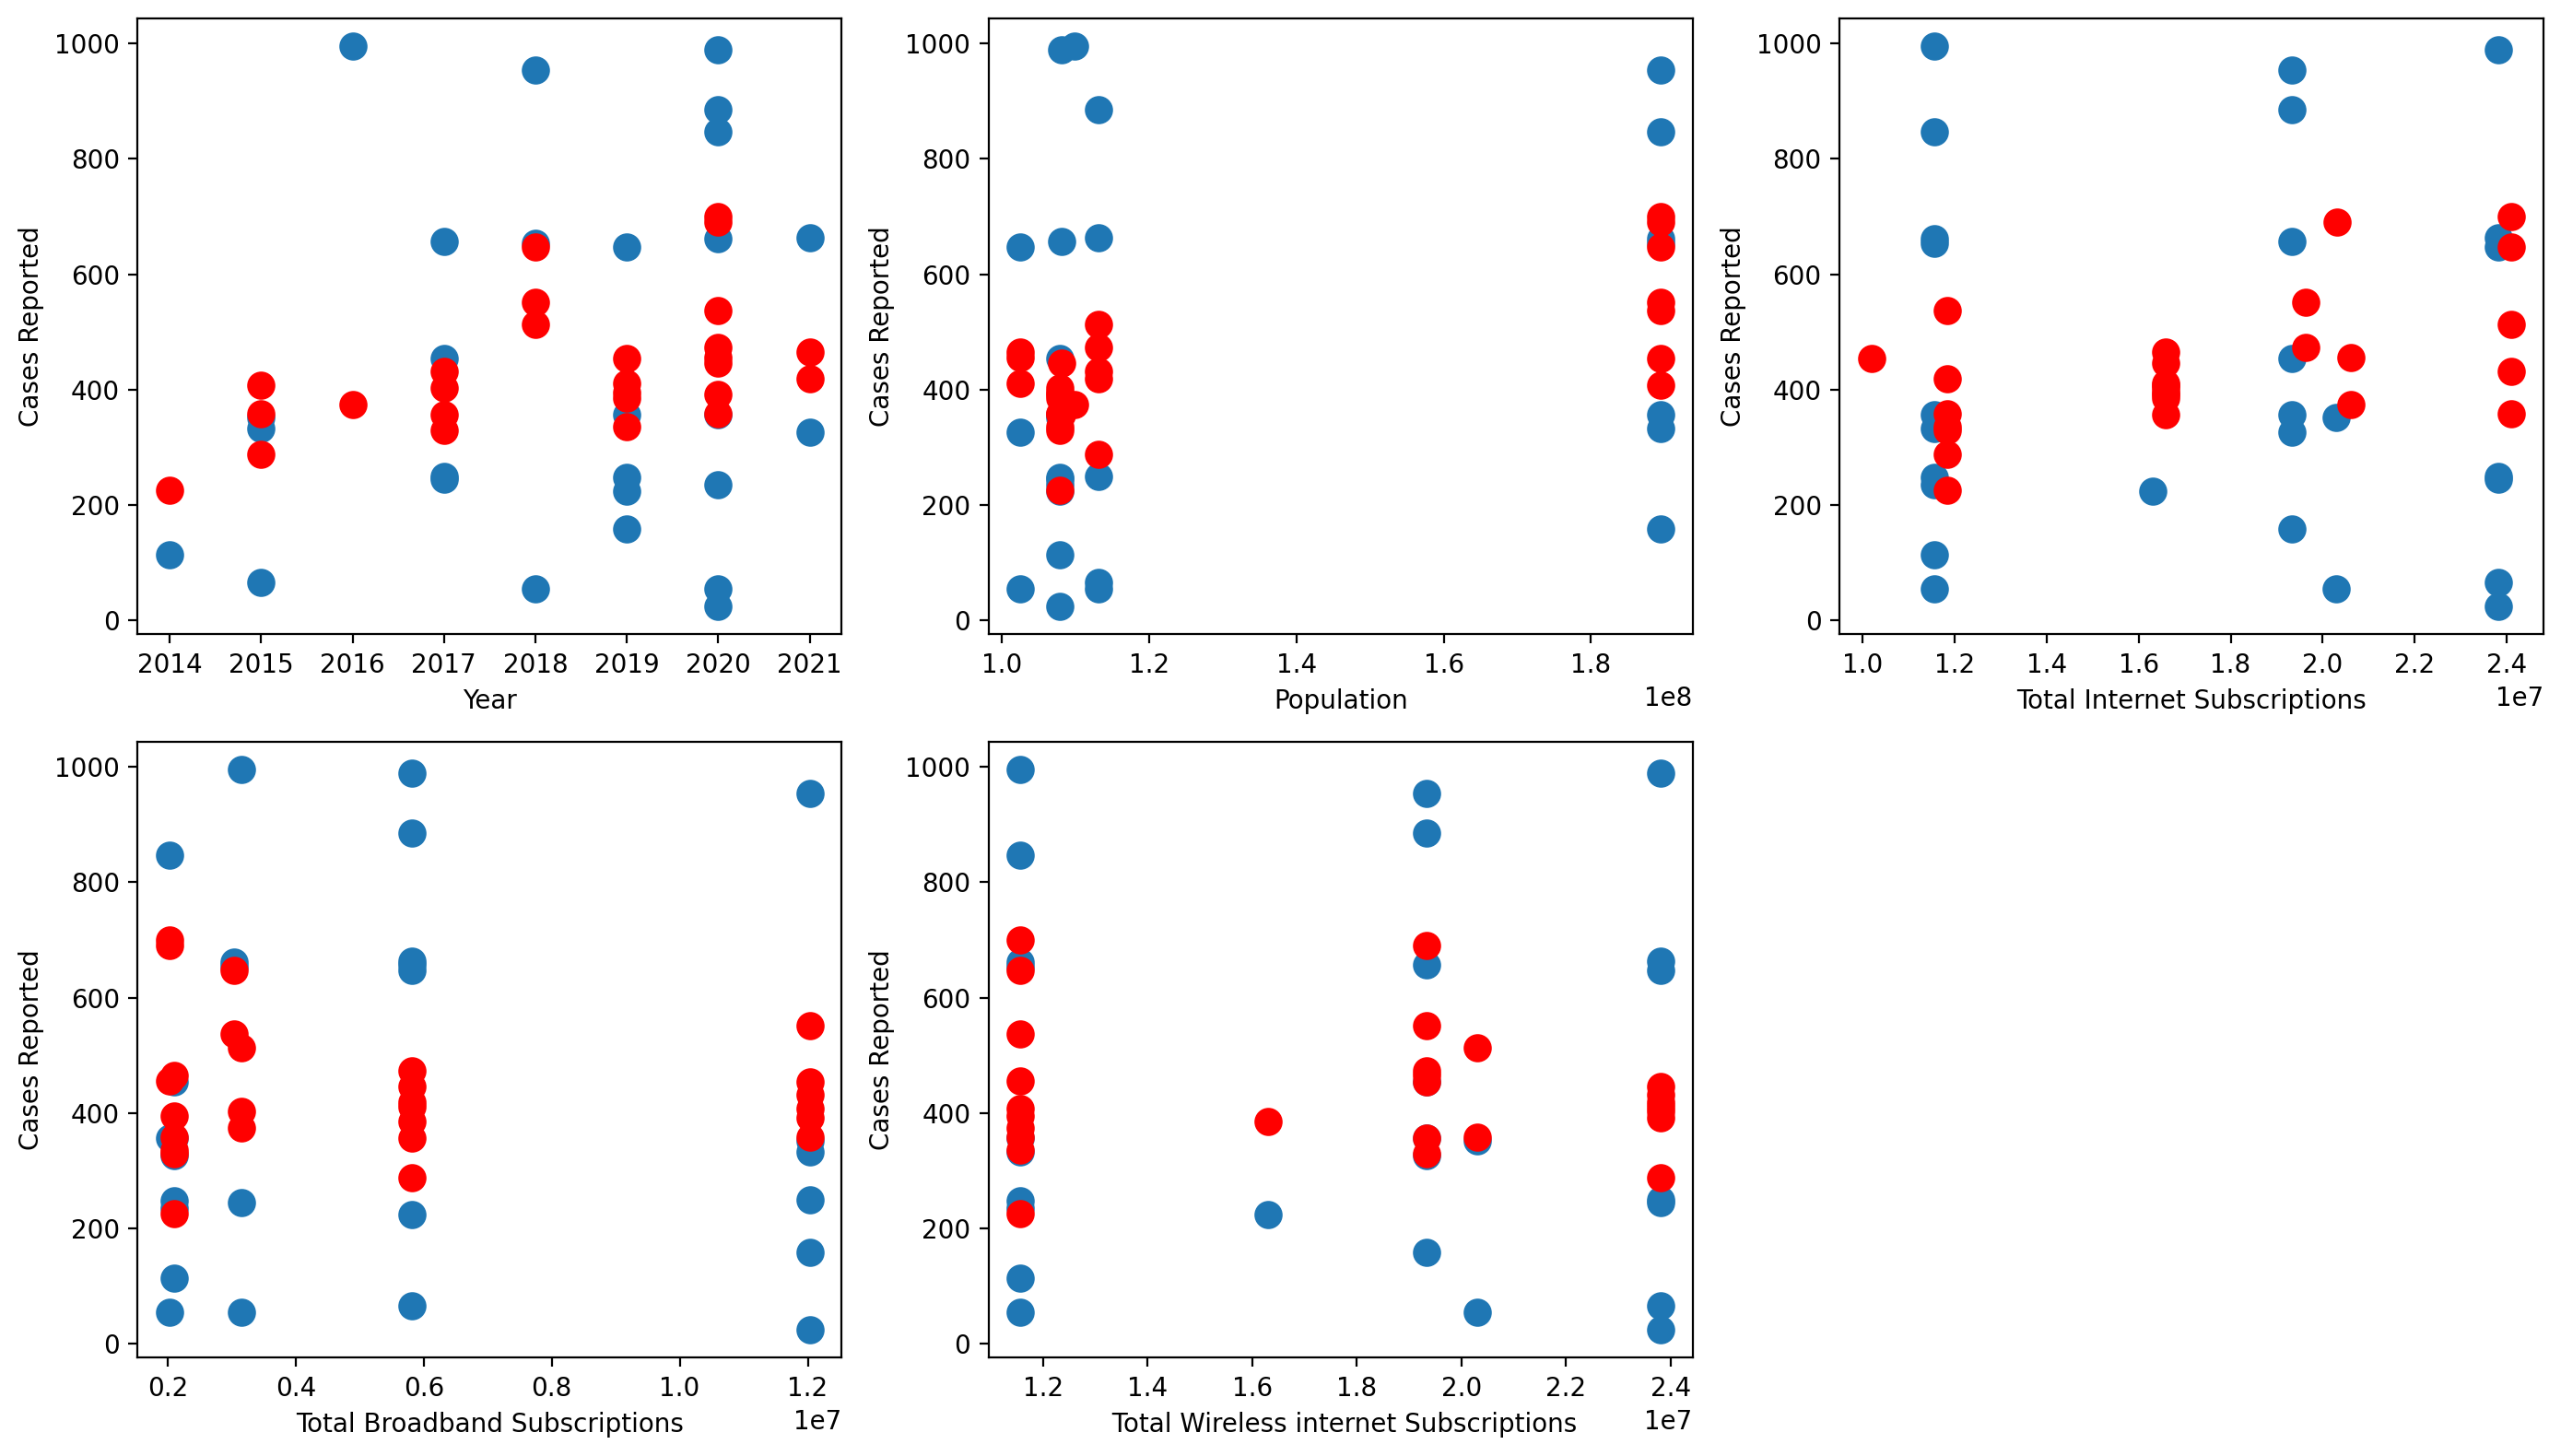

In [132]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,8), dpi=200)

axes[0,0].plot(one_state['Year'], one_state['Cases Reported'], 'o',  markersize=10)
axes[0,0].plot(one_state['Year'], predicted_crimes, 'o', color='red', markersize=10)
axes[0,0].set_ylabel('Cases Reported')
axes[0,0].set_xlabel('Year')

axes[0,1].plot(one_state['Population'], one_state['Cases Reported'], 'o', markersize=10)
axes[0,1].plot(one_state['Population'], predicted_crimes, 'o', color='red', markersize=10)
axes[0,1].set_ylabel('Cases Reported')
axes[0,1].set_xlabel('Population')

axes[0,2].plot(one_state[' Total Wireless internet Subscriptions'], one_state['Cases Reported'], 'o', markersize=10)
axes[0,2].plot(one_state['Total Internet Subscriptions'], predicted_crimes, 'o', color='red', markersize=10)
axes[0,2].set_ylabel('Cases Reported')
axes[0,2].set_xlabel('Total Internet Subscriptions')

axes[1,0].plot(one_state['Total Broadband Subscriptions'], one_state['Cases Reported'], 'o', markersize=10)
axes[1,0].plot(one_state['Total Broadband Subscriptions'], predicted_crimes, 'o', color='red', markersize=10)
axes[1,0].set_ylabel('Cases Reported')
axes[1,0].set_xlabel('Total Broadband Subscriptions')

axes[1,1].plot(one_state[' Total Wireless internet Subscriptions'], one_state['Cases Reported'], 'o', markersize=10)
axes[1,1].plot(one_state[' Total Wireless internet Subscriptions'], predicted_crimes, 'o', color='red', markersize=10)
axes[1,1].set_ylabel('Cases Reported')
axes[1,1].set_xlabel(' Total Wireless internet Subscriptions')

fig.delaxes(axes[1,2])

plt.tight_layout()

In [133]:
dump(final_model, 'saved_model.joblib')
loaded_model = load('saved_model.joblib')
loaded_model.coef_

array([ 2.20878336e+01,  2.29981142e-06,  1.26174668e-05, -8.72129715e-06,
        4.95586264e-06])

In [134]:
X.shape

(27, 5)

In [135]:
X

,Year,Population,Total Internet Subscriptions,Total Broadband Subscriptions,Total Wireless internet Subscriptions
0,2014,107823158,11850000,2100000,11570000
3,2017,113042198,24100000,12030000,23810000
6,2015,107823158,24100000,12030000,20301131
9,2021,102504976,16580000,2100000,19340000
14,2020,189462003,11850000,3031646,11570000
19,2020,102504976,20610516,2031605,11570000
24,2018,113042198,24100000,3150000,20301131
29,2017,107823158,16580000,3150000,23810000
34,2020,189462003,20310356,2031605,19340000
39,2019,189462003,10200316,12030000,19340000


In [136]:
y

0      114
3      249
6      352
9      326
14     661
19      54
24      54
29     245
34     357
39     159
44     954
48     885
52     224
56     995
60     654
65     847
70     332
75     648
80     989
85     657
91      24
96      65
101    664
104    454
108    235
112    356
116    248
Name: Cases Reported, dtype: int64

In [137]:
data.head()

,State/UT,Cases in 2015,Cases in 2016,Cases in 2017,Cases in 2018,Cases in 2019,Cases in 2020,Cases in 2021,Total Crimes
0,ap,536,616,931,1207,1886,2436,2645,10257
1,Karnataka,6,4,1,7,8,10,13,49
2,Bihar,483,696,1120,2022,2231,2765,3024,12341
3,Chhattisgarh,103,90,171,139,175,234,315,1227
4,Bihar,49,5,36,65,78,12,32,277


In [138]:
print(data.columns)

Index(['State/UT', 'Cases in 2015', 'Cases in 2016', 'Cases in 2017',
       'Cases in 2018', 'Cases in 2019', 'Cases in 2020', 'Cases in 2021',
       'Total Crimes'],
      dtype='object')


In [139]:
years_known = [2014, 2015, 2016, 2017, 2018, 2019, 2020,2021]
state=state_info['state ']
all_states = list(set(df['State '].to_list()))
all_states
all_states.sort()
state_df = df[df['State '] == state]
state_df

,Unique Code,State,Year,Population,Total Internet Subscriptions,Total Broadband Subscriptions,Total Wireless internet Subscriptions,Cases Reported
0,4,Bihar,2014,107823158,11850000,2100000,11570000,114
3,4,Bihar,2017,113042198,24100000,12030000,23810000,249
6,4,Bihar,2015,107823158,24100000,12030000,20301131,352
9,4,Bihar,2021,102504976,16580000,2100000,19340000,326
14,4,Bihar,2020,189462003,11850000,3031646,11570000,661
19,4,Bihar,2020,102504976,20610516,2031605,11570000,54
24,4,Bihar,2018,113042198,24100000,3150000,20301131,54
29,4,Bihar,2017,107823158,16580000,3150000,23810000,245
34,4,Bihar,2020,189462003,20310356,2031605,19340000,357
39,4,Bihar,2019,189462003,10200316,12030000,19340000,159


In [140]:
years_data_known = state_df['Cases Reported'].to_list()
years_data_known

[114,
 249,
 352,
 326,
 661,
 54,
 54,
 245,
 357,
 159,
 954,
 885,
 224,
 995,
 654,
 847,
 332,
 648,
 989,
 657,
 24,
 65,
 664,
 454,
 235,
 356,
 248]

In [141]:
years_display = [x for x in years_known]
years_display.append(int(state_info['year']))
sample_input=[]
sample_input.append(state_info['year'])
sample_input.append(state_info['population'])
sample_input.append(state_info['tis'])
sample_input.append(state_info['tbs'])
sample_input.append(state_info['twis'])
input=[[int(n) for n in sample_input]]
result=loaded_model.predict(input)
year=input[0][0]
years_known.append(year)
state_data = state_df.to_dict(orient='list')
years_data_known.append(result[0])

State: Bihar
Predicted crime in 2018 is 701


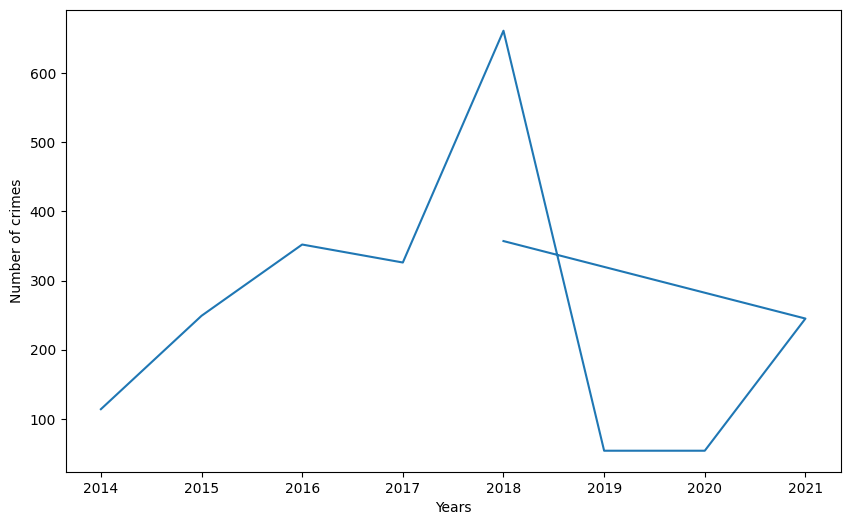

In [142]:
#grapgh of prediction
out=result[0]
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Years')
plt.ylabel('Number of crimes')
plt.plot(years_known, years_data_known[:len(years_known)])
print("State:",state)
print("Predicted crime in",year,"is",int(out))